<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#SGD" data-toc-modified-id="SGD-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SGD</a></span><ul class="toc-item"><li><span><a href="#stochastic-gradient-descent-with-restarts-(SGDR)." data-toc-modified-id="stochastic-gradient-descent-with-restarts-(SGDR).-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>stochastic gradient descent with restarts (SGDR).</a></span><ul class="toc-item"><li><span><a href="#Question:-Could-we-get-the-same-effect-by-using-random-starting-point?" data-toc-modified-id="Question:-Could-we-get-the-same-effect-by-using-random-starting-point?-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Question: Could we get the same effect by using random starting point?</a></span></li><li><span><a href="#Question:-Our-goal-is-to-generalize-and-not-end-up-in-the-narrow-optima.-In-this-method,-are-we-keeping-track-of-the-minima-and-averaging-them-and-ensembling-them?" data-toc-modified-id="Question:-Our-goal-is-to-generalize-and-not-end-up-in-the-narrow-optima.-In-this-method,-are-we-keeping-track-of-the-minima-and-averaging-them-and-ensembling-them?-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Question: Our goal is to generalize and not end up in the narrow optima. In this method, are we keeping track of the minima and averaging them and ensembling them?</a></span></li></ul></li></ul></li><li><span><a href="#Broyden–Fletcher–Goldfarb–Shanno-(BFGS)-[1:20:18]" data-toc-modified-id="Broyden–Fletcher–Goldfarb–Shanno-(BFGS)-[1:20:18]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Broyden–Fletcher–Goldfarb–Shanno (BFGS) [1:20:18]</a></span></li></ul></div>

# SGD
## stochastic gradient descent with restarts (SGDR). 
The basic idea is as you get closer and closer to the spot with the minimal loss, you may want to start decrease the learning rate (taking smaller steps) in order to get to exactly the right spot.

- **learning rate annealing** is decreasing the learning rate $\mu$ as we train. 
Stepwise annealing is most common: train a model with a given $\mu_1$ for a while, 
and when it stops improving, manually drop to $\mu_2 < \mu_1$ .
- A better approach is to pick a functional form. 
A very good form is *one half of the cosine curve* which maintains the high $\mu$ 
for a while at the beginning, then drops quickly when you get closer.
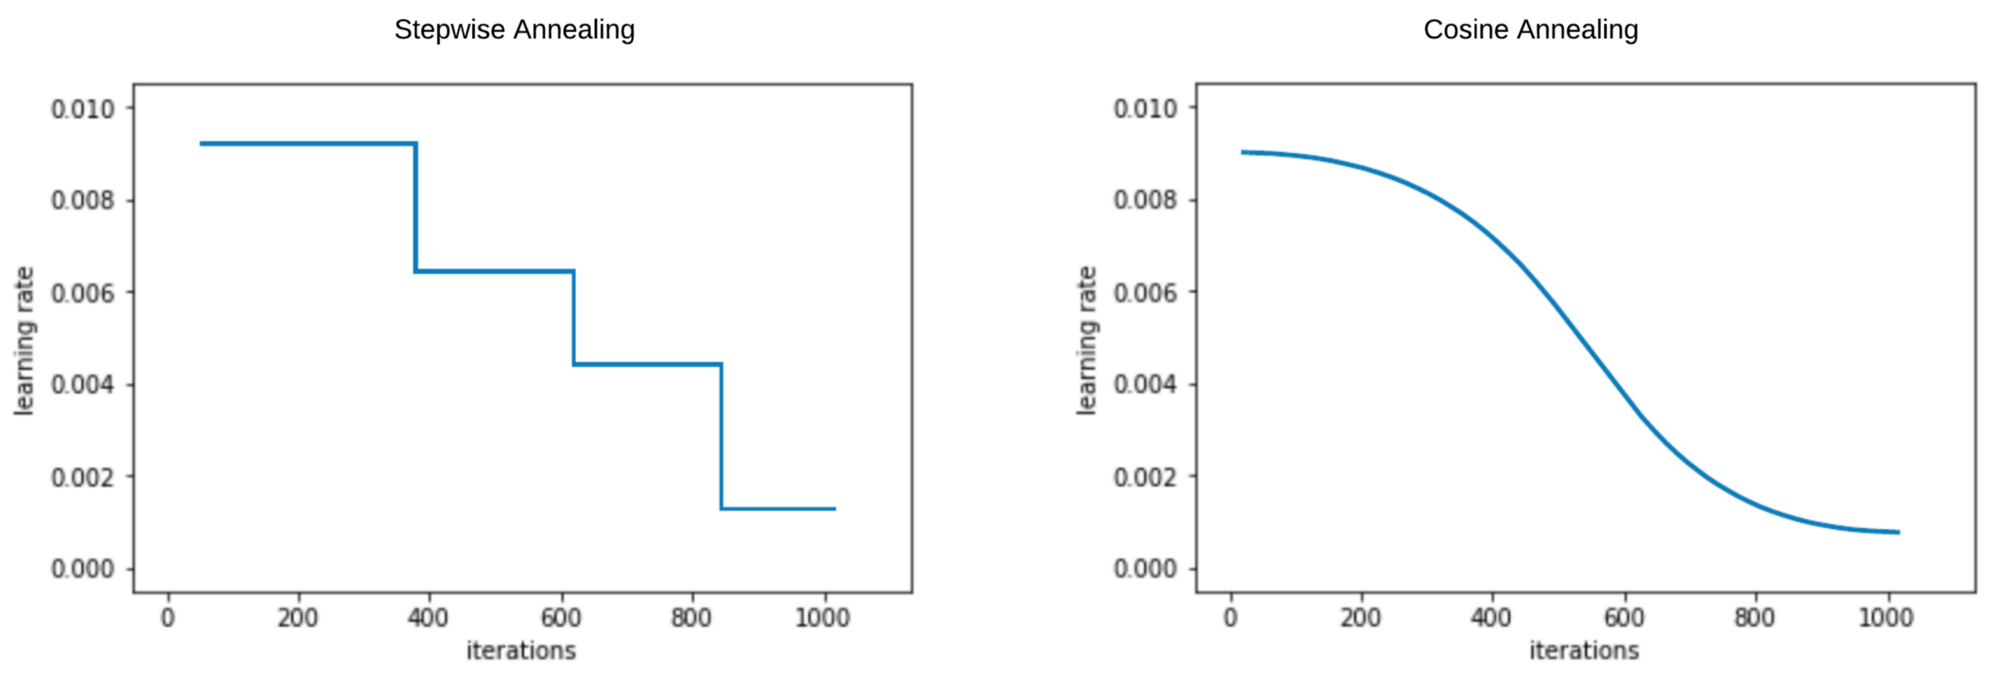

However, we may find ourselves in a part of the weight space that isn’t very resilient — that is, small changes to the weights may result in big changes to the loss. 
We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase $\mu$ (‘Restarts’ in ‘SGDR’), 
which forces the model to jump to a different part of the weight space if the current area is “spiky”. 
Here’s a picture of how that might look if we reset the learning rates 3 times. 
In ["Snapshot Ensembles: Train 1, get M for free"](https://arxiv.org/abs/1704.00109) they call it a “cyclic LR schedule”:

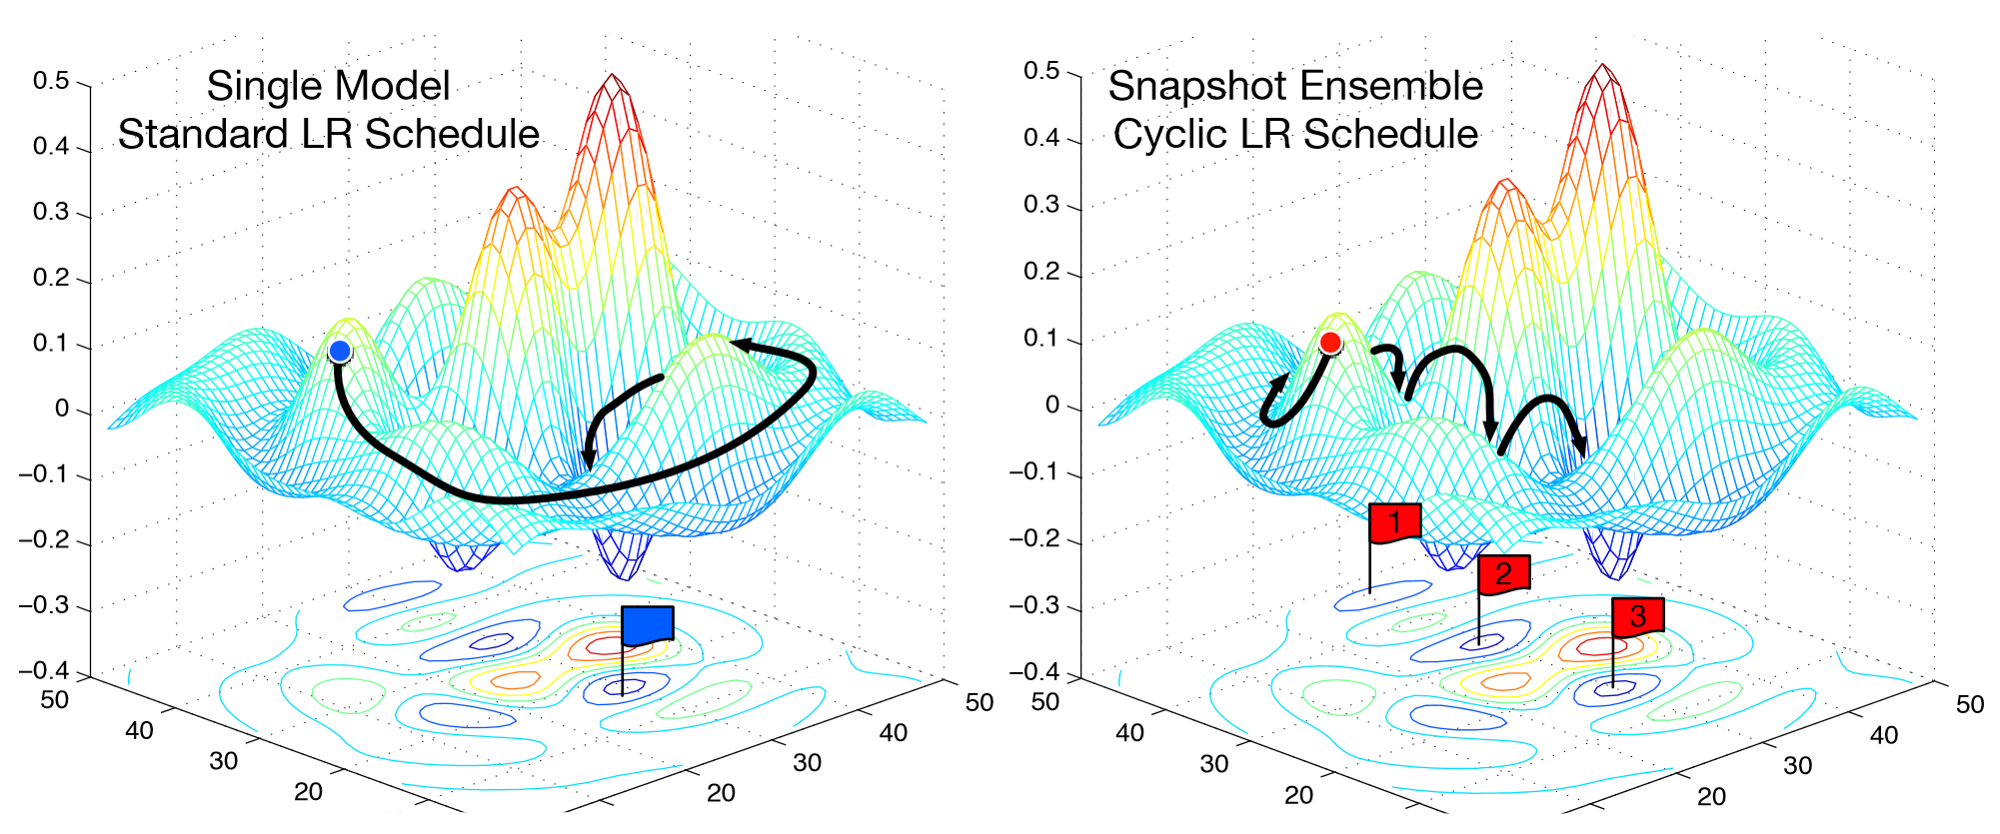

The number of epochs between resetting $\mu$ is set by `cycle_len`.
The number of times this reset happens is the `number of cycles`, the 2nd parameter to fit(). 
So here's what our actual learning rates looked like:
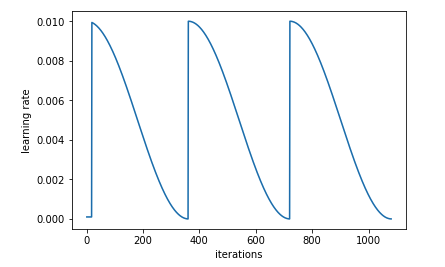

### Question: Could we get the same effect by using random starting point? 
[35:40] 
Before SGDR, people used “ensembles”.
They would relearn a whole new model 10 times hoping that one of them would end up better. 
In SGDR, once we get close enough to the optimal and stable area, 
resetting will not actually “reset” but the weights keeps better. 
**SGDR will give better results than just randomly trying different starting points.**
It is important to pick a $\mu$ (which is the highest learning rate SGDR uses) 
that is **big enough** to allow the reset to jump to a different part of the function. [37:25]
SGDR reduces $\mu$ every mini-batch, 
and reset occurs every cycle_len epoch (in this case it is set to 1).

### Question: Our goal is to generalize and not end up in the narrow optima. In this method, are we keeping track of the minima and averaging them and ensembling them? 
[39:27] 
That is another level of sophistication and you see “Snapshot Ensemble” in the diagram. 
We are not doing that.
If you wanted it to generalize even better, you can save the weights right before the resets and take the average. 
But for now, we are just going to pick the last one.
If you want to skip ahead, there is a parameter called `cycle_save_name` which you can add 
as well as `cycle_len`, which will save a set of weights at the end of every learning rate cycle.
Then you can ensemble them [40:14].

Only paper which has discriminative learning rate uses something called LARS. 
It was used to train ImageNet with very large batch sizes by looking at the ratio between the gradient and the mean at each layer, and using that to change the learning rate of each layer automatically. 
They found that they could use much larger batch sizes. 

# Broyden–Fletcher–Goldfarb–Shanno (BFGS) [1:20:18]

A new (optim.LBFGS). 
Long history of a different kind of algorithm for optimization that we don’t use to train DNNs. 
But these techniques on the whole don’t work very well. 
But for style-transfer it works well. 
It is an interesting algorithm. 
BFGS (initials of four different people) and the L stands for limited memory. 
It is an optimizer so as an optimizer, that means that there’s some loss function and it’s going to use some gradients (not all optimizers use gradients but all the ones we use do) 
to find a direction to go and try to make the loss function go lower and lower by adjusting some parameters. It’s an interesting optimizer because it does a bit more work than the ones we’re used to on each step. Specifically, it starts the same way that we are used to, 
just pick somewhere to get started and in this case, we’ve picked a random image. 
As per usual, we calculate the gradient. 
But we then don’t just take a step but we try to find the second derivative. 
The second derivative says how fast does the gradient change.

- Gradient: how fast the function change
- The second derivative: how fast the gradient change

In other words, how curvy is it? 
The basic idea is that if you know that it’s not very curvy, then you can probably jump farther. 
But if it is very curvy, we don’t want to jump as far. 
So in higher dimensions, the gradient is the Jacobian, and the second derivative is the Hessian. 
With BFGS, we calculate the 2nd derivative and then use it 
to figure out what direction to go and how far to go — so it’s less of a wild jump into the unknown.

Calculating the Hessian is not a good idea[1:24:15]. 
Because in each possible direction that you head, 
for each direction that you’re measuring the gradient in, 
you also have to calculate the Hessian in every direction. 
It gets big. 
So rather than actually calculating it, we take a few steps and we basically look at how much the gradient is changing as we do each step, and we approximate the Hessian using that little function. 
Again, this seems obvious, but nobody thought of it. 
Keeping track of every step is expensive in memory, 
so we only keep the last 10 or 20. 
That’s the L of LBFGS: a limited-memory BFGS, ie keep the last 10-20 gradients, 
use that to approximate the amount of curvature, and then use the curvature in gradient to estimate what direction to travel and how far. <br>

That’s normally not a good idea in DL (for optimizing weights):  
- It’s more work to do than Adam or SGD update, 
- it uses more memory — a big issue for GPUs 
- mini-batch is super bumpy 
so figuring out curvature to decide exactly how far to travel is ... "polishing turds" (Something inherently bad cannot be improved.)
- Using the Hessian is a "magnet" for saddle points. 
Theoretical results show that it goes towards flat areas.. 

But [1:26:40], we are optimizing **pixels** so rules change and BFGS make sense. 
Because it does more work each time, it’s a different optimizer, the API is different in PyTorch. 
As you can see here, when you say optimizer.step, you actually pass in the loss function. 
So our loss function is to call step with a particular loss function which is our activation loss (`actn_loss`). 
And inside the loop, you don’t say step, step, step. But rather it looks like this. So it’s a little bit different and you’re welcome to try and rewrite this to use SGD, it’ll still work. 
It’ll just take longer.